# Basic Analysis of stock information

In [121]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from past.builtins import xrange
from pandas_datareader import DataReader 
from datetime import datetime
from __future__ import division

In [50]:
tech_list = ['AAPL','GOOG', 'MSFT','AMZN']

In [51]:
#limit the time to 1 year from now
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [52]:
#Bring stock information from yahoo and make company  global
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [72]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000,245.000000,235.000000,205.000000,253.000000
mean,293.118898,286.115276,289.205827,290.009724,3.599791e+07,288.519194,287.204120,286.419446,284.913846,0.003607
std,57.821586,56.240017,56.966597,57.229847,1.721255e+07,57.689697,52.744309,48.722247,36.498645,0.026477
min,202.050003,199.149994,199.619995,200.479996,1.165440e+07,198.510406,204.856447,205.878305,216.188012,-0.128647
25%,250.457500,242.000000,247.194996,246.602501,2.445828e+07,244.702698,247.762730,252.771275,265.462847,-0.006774
50%,285.914993,278.875000,281.899994,283.585007,3.129205e+07,281.975708,280.866925,281.298973,282.851631,0.003638
75%,323.382492,317.284996,320.187500,319.514992,4.168990e+07,318.522713,317.023413,315.115939,304.361827,0.016086
max,457.649994,441.190002,452.820007,455.609985,1.067212e+08,454.790009,436.032651,408.481413,377.933943,0.119808


In [54]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-08-12 to 2020-08-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


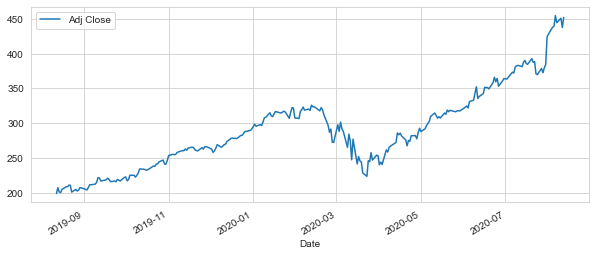

In [58]:
# see the closing price 
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

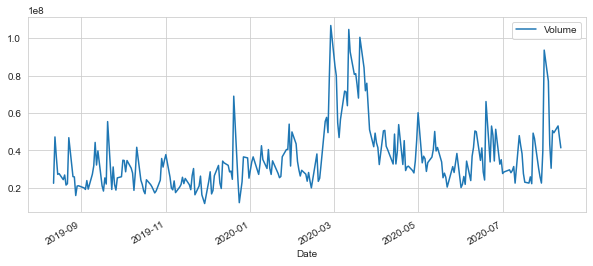

In [59]:
#total volume of stock being traded each day 
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [64]:
# calculate moving average
ma_day = [10,20,50]
for ma in ma_day:
    column_name="MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

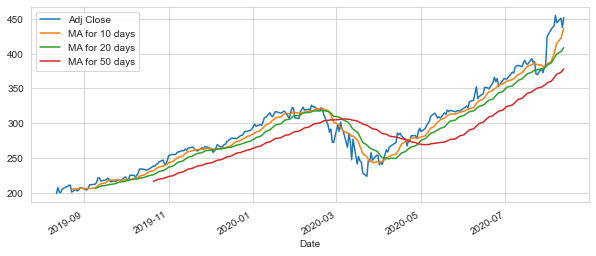

In [66]:
#plot the rolling day
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

# 2.Daily Return Analysis


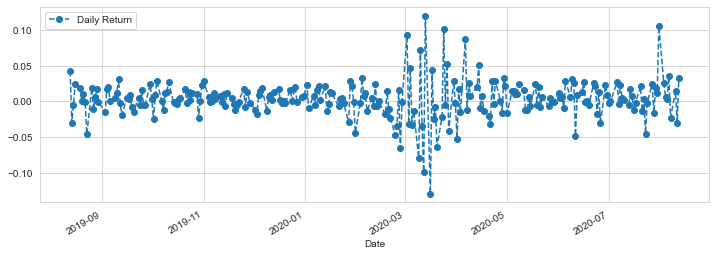

In [71]:
# use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

In [73]:
AAPL

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2019-08-12,202.050003,199.149994,199.619995,200.479996,22474900.0,198.510406,NaN,NaN,NaN,NaN
2019-08-13,212.139999,200.479996,201.020004,208.970001,47218500.0,206.917007,NaN,NaN,NaN,0.042348
2019-08-14,206.440002,202.589996,203.160004,202.750000,36547400.0,200.758102,NaN,NaN,NaN,-0.029765
2019-08-15,205.139999,199.669998,203.460007,201.740005,27227400.0,199.758026,NaN,NaN,NaN,-0.004981
2019-08-16,207.160004,203.839996,204.279999,206.500000,27620400.0,204.471252,NaN,NaN,NaN,0.023595
...,...,...,...,...,...,...,...,...,...,...
2020-08-06,457.649994,439.190002,441.619995,455.609985,50607200.0,454.790009,407.559164,396.333406,367.817419,0.034889
2020-08-07,454.700012,441.170013,452.820007,444.450012,49453300.0,444.450012,415.024841,399.406433,370.352875,-0.022736
2020-08-10,455.100006,440.000000,450.399994,450.910004,53100900.0,450.910004,422.260098,402.890800,373.023719,0.014535


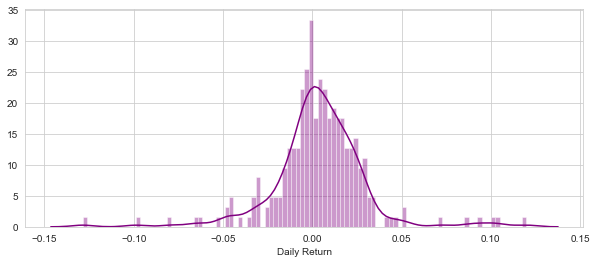

In [76]:
#drop Nan values, plot for combining plots, by dfault a kde over a histogram
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

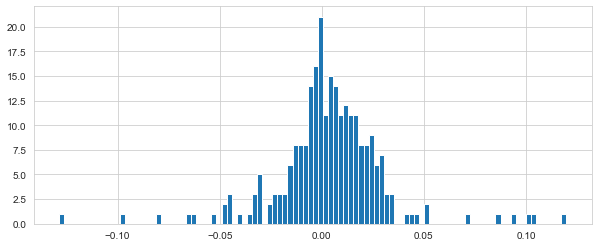

In [78]:
#show histogram
AAPL['Daily Return'].hist(bins=100)

In [79]:
# grab all closing prices from stock yahoo
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [81]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-08-12,198.510406,1174.709961,134.139359,1784.920044
2019-08-13,206.917007,1197.270020,136.915222,1824.339966
2019-08-14,200.758102,1164.290039,132.792084,1762.959961
2019-08-15,199.758026,1167.260010,132.494751,1776.119995
2019-08-16,204.471252,1177.599976,134.923050,1792.569946


In [82]:
tech_rets = closing_df.pct_change()

In [83]:
#percent change of closing price
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-08-12,NaN,NaN,NaN,NaN
2019-08-13,0.042348,0.019205,0.020694,0.022085
2019-08-14,-0.029765,-0.027546,-0.030115,-0.033645
2019-08-15,-0.004981,0.002551,-0.002239,0.007465
2019-08-16,0.023595,0.008858,0.018328,0.009262


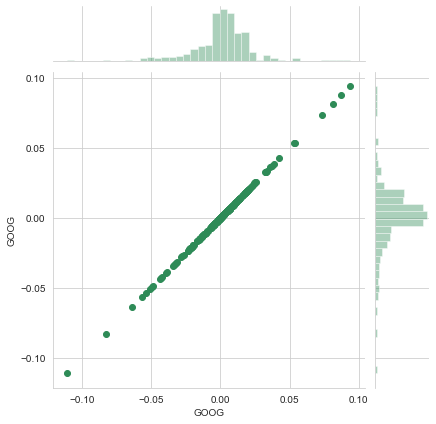

In [85]:
#Comparing Google to itself 
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

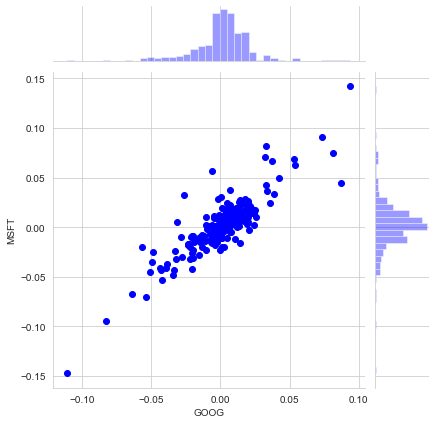

In [89]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='blue')

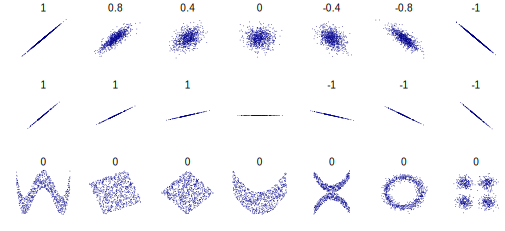

In [90]:
# check correlation by graph
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

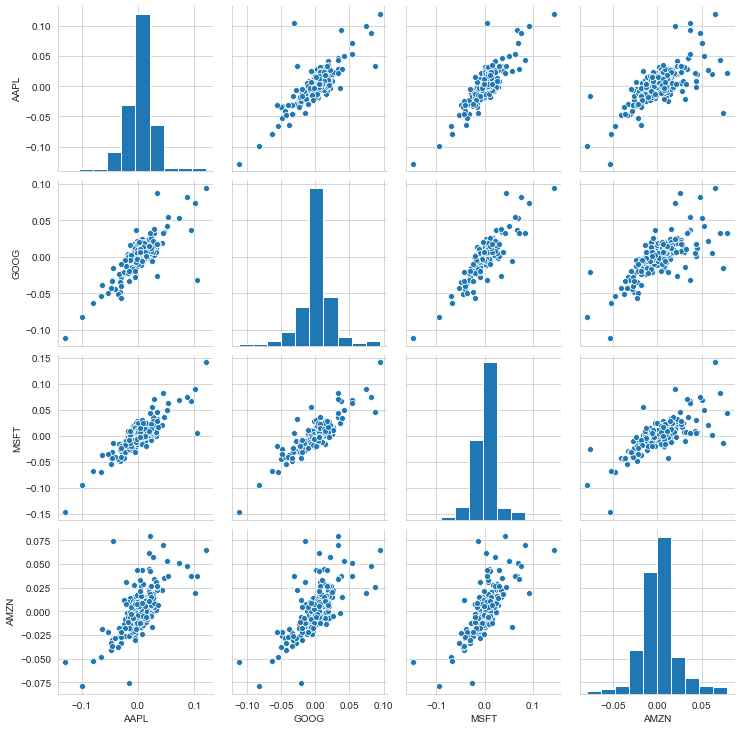

In [92]:
# pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

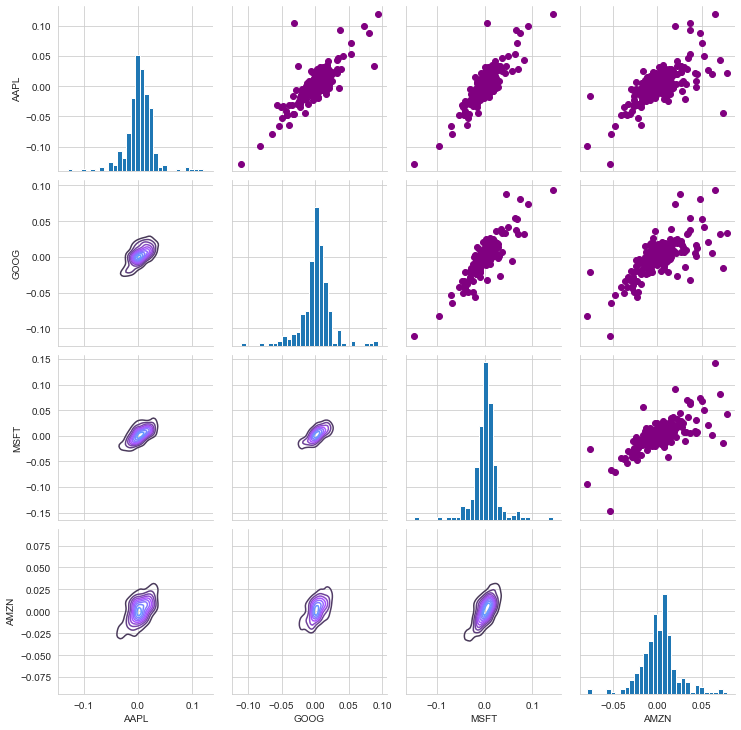

In [93]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

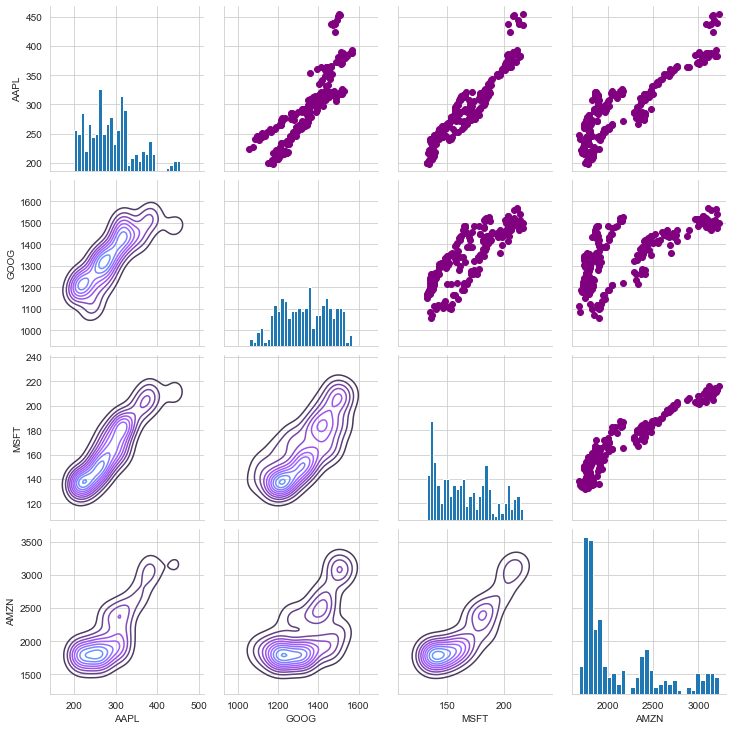

In [95]:
# correlation by closing price not percentage
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

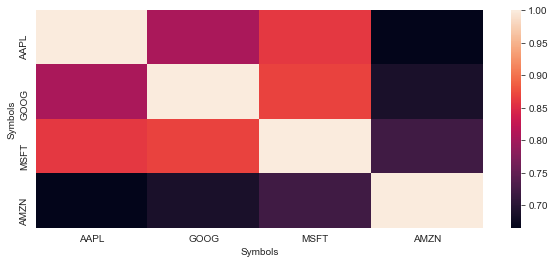

In [100]:
sns.heatmap(tech_rets.corr(),annot=False)

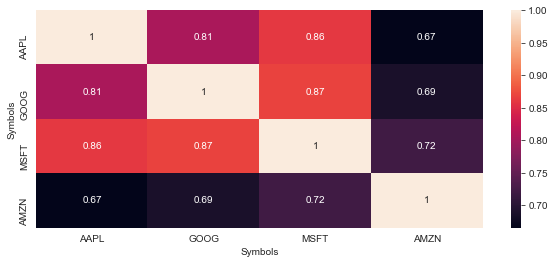

In [101]:
sns.heatmap(tech_rets.corr(),annot=True)

MSFT and Google had the strongest correlation(0.87) of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 3. Risk Analysis


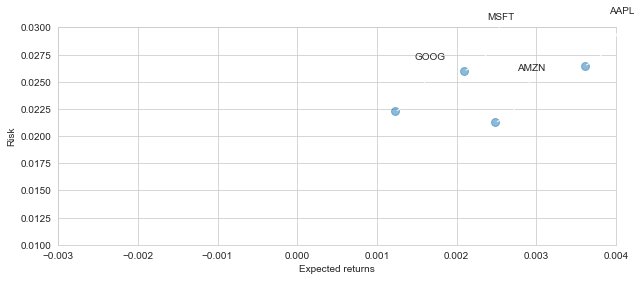

In [106]:
rets = tech_rets.dropna()
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)
plt.ylim([0.01,0.030])
plt.xlim([-0.003,0.004])
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

# Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

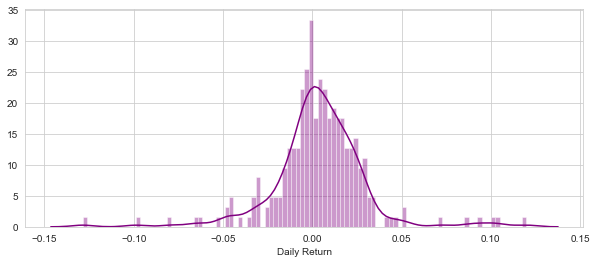

In [107]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [109]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-08-13,0.042348,0.019205,0.020694,0.022085
2019-08-14,-0.029765,-0.027546,-0.030115,-0.033645
2019-08-15,-0.004981,0.002551,-0.002239,0.007465
2019-08-16,0.023595,0.008858,0.018328,0.009262
2019-08-19,0.018644,0.017705,0.016749,0.013138


In [108]:
rets['AAPL'].quantile(0.05)

-0.03421550470326788

That means that with 95% confidence, our worst daily loss will not exceed 3.4%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.034 * 1,000,000 = $34,000

# Value at Risk using the Monte Carlo method



We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

In [110]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [111]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    # Run price array for number of days
    for x in xrange(1,days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

In [119]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-12,1184.959961,1167.671997,1179.209961,1174.709961,1003000,1174.709961
2019-08-13,1204.780029,1171.459961,1171.459961,1197.270020,1294400,1197.270020
2019-08-14,1182.300049,1160.540039,1176.310059,1164.290039,1578700,1164.290039
2019-08-15,1175.839966,1162.109985,1163.500000,1167.260010,1218700,1167.260010
2019-08-16,1182.719971,1171.810059,1179.550049,1177.599976,1313300,1177.599976


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

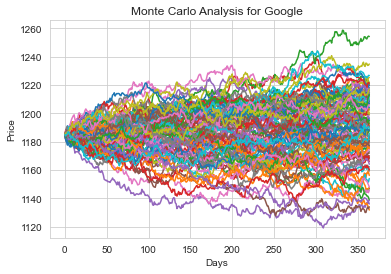

In [122]:
# Get start price from GOOG.head()
start_price = 1184.959961

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [123]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

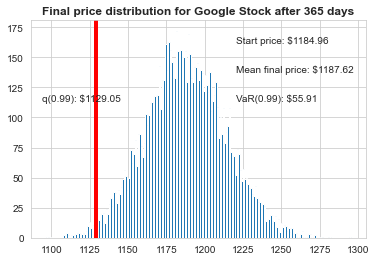

In [124]:
# define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Find out 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $55.91 for every investment of 1184.959961(the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $55.91 at risk 99% of the time from our Monte Carlo Simulation.